Week 1

In [ ]:
#Lab 1

In [ ]:
#Download the data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-06 14:46:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.250.101.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   148MB/s    in 0.4s    

2023-07-06 14:46:43 (148 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
#Assigning variables to each directories

import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.888.jpg', 'cat.741.jpg', 'cat.130.jpg', 'cat.73.jpg', 'cat.83.jpg', 'cat.342.jpg', 'cat.473.jpg', 'cat.863.jpg', 'cat.66.jpg', 'cat.918.jpg']
['dog.80.jpg', 'dog.184.jpg', 'dog.236.jpg', 'dog.957.jpg', 'dog.460.jpg', 'dog.866.jpg', 'dog.907.jpg', 'dog.513.jpg', 'dog.321.jpg', 'dog.783.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(train_cats_dir )))
print('total training dog images :', len(os.listdir(train_dogs_dir )))

print('total validation cat images :', len(os.listdir(validation_cats_dir )))
print('total validation dog images :', len(os.listdir(validation_dogs_dir )))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

NameError: ignored

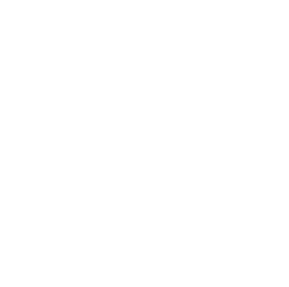

In [ ]:
#Set up matplotlib fig, and size to to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                 for fname in train_cat_fnames[pic_index - 8 : pic_index]
                ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                 for fname in train_dog_fnames[pic_index - 8 : pic_index]
                ]

for i, ima_path in enumerate(next_cat_pix + next_dog_pix):
  #Set up the subplot, subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')              #Don't show axis, or gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Training

history = model.fit(train_generator,
                    epochs = 15,
                    validation_data = validation_generator,
                    verbose = 2)

Epoch 1/15
100/100 - 72s - loss: 0.7080 - accuracy: 0.5295 - val_loss: 0.6672 - val_accuracy: 0.6400 - 72s/epoch - 716ms/step
Epoch 2/15
100/100 - 70s - loss: 0.6373 - accuracy: 0.6375 - val_loss: 0.6035 - val_accuracy: 0.6540 - 70s/epoch - 698ms/step
Epoch 3/15
100/100 - 68s - loss: 0.5773 - accuracy: 0.6965 - val_loss: 0.5790 - val_accuracy: 0.6910 - 68s/epoch - 676ms/step
Epoch 4/15
100/100 - 66s - loss: 0.5259 - accuracy: 0.7510 - val_loss: 0.5776 - val_accuracy: 0.6660 - 66s/epoch - 664ms/step
Epoch 5/15
100/100 - 69s - loss: 0.4886 - accuracy: 0.7590 - val_loss: 0.5215 - val_accuracy: 0.7340 - 69s/epoch - 693ms/step
Epoch 6/15
100/100 - 67s - loss: 0.4235 - accuracy: 0.8040 - val_loss: 0.6182 - val_accuracy: 0.6970 - 67s/epoch - 668ms/step
Epoch 7/15
100/100 - 68s - loss: 0.3568 - accuracy: 0.8405 - val_loss: 0.6247 - val_accuracy: 0.7390 - 68s/epoch - 682ms/step
Epoch 8/15
100/100 - 68s - loss: 0.2848 - accuracy: 0.8790 - val_loss: 0.6165 - val_accuracy: 0.7380 - 68s/epoch - 681

In [ ]:
#Model Prediction

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = '/content/' + fn
  img = load_img(path, target_size = (150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving FELV-cat.jpg to FELV-cat (2).jpg
1/1 [==============================] - 0s 33ms/step
[1.]
FELV-cat.jpg is a dog


1/1 [==============================] - 0s 280ms/step


<ipython-input-18-017c292e8317>:50: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


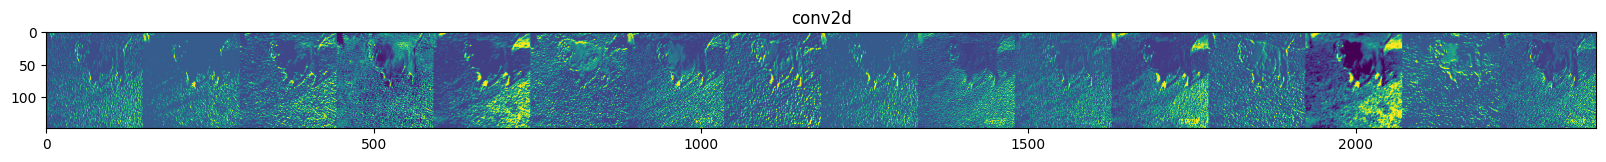

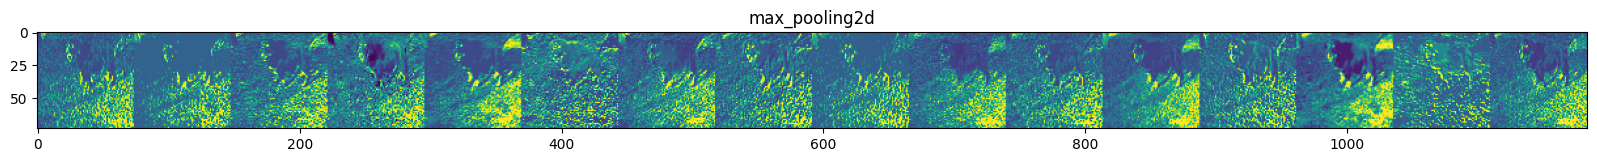

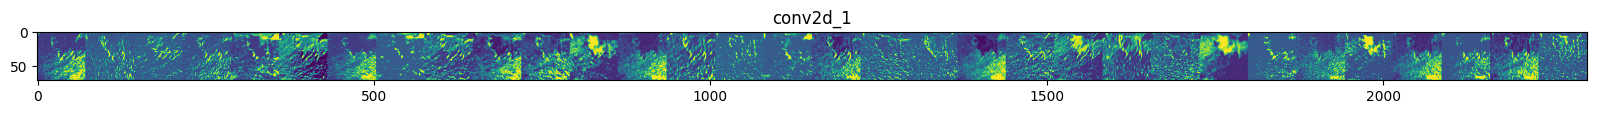

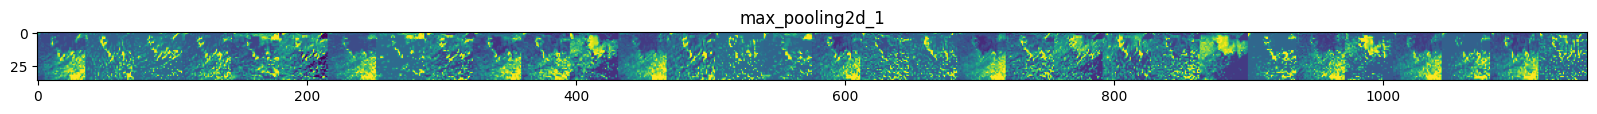

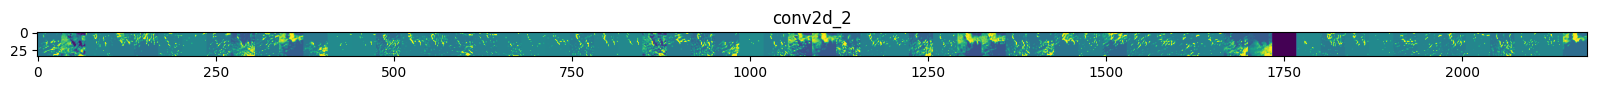

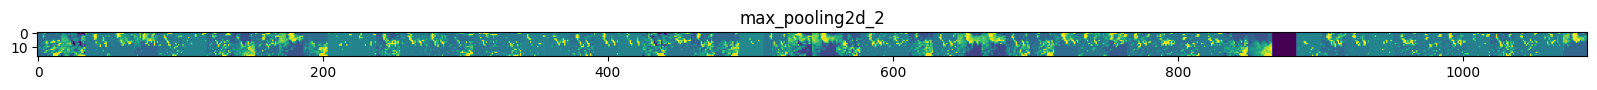

In [ ]:
# Visualizing Intermediate Representations

import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

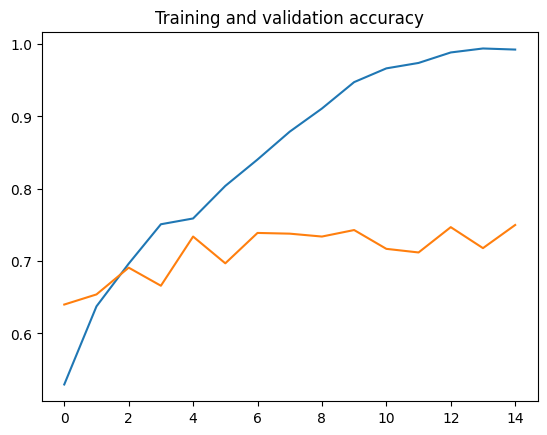

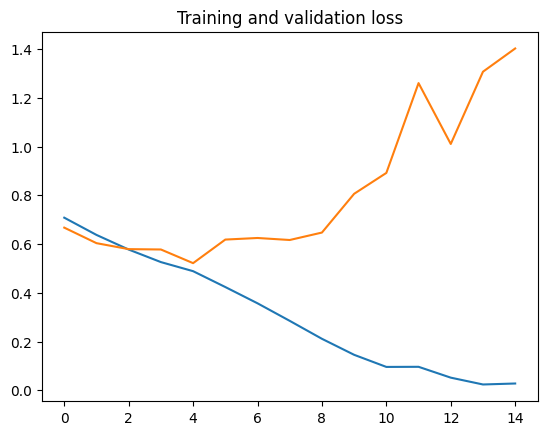

In [ ]:
# Evaluating Accuracy and Loss for the Model

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Week 2

In [ ]:
# Image Data Loading

In [ ]:
# image_dataset_from_directory function

import tensorflow as tf
from tensorflow import keras

tf.keras.utils.image_dataset_from_directory(
    directory,
    labels = "inferred",
    label_mode = "int",
    class_name = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (256, 256),
    suffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    intepolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
    **kwagrs
)

# Generates a tf.data.Dataset from image files in a directory.

NameError: ignored

In [ ]:
# load_img function

tf.keras.utils.load_img(
    path,
    greyscale = False,
    color_mode = "rgb",
    target_size = None,
    interpolation = "nearest",
    keep_aspect_ratio = False,
)

# Loads an image into PIL format.

#Uses

image = tf.keras.utils.load_img(image_path)
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

NameError: ignored

In [ ]:
# img_to_array function

tf.keras.utils.img_to_array(img, data_format=None, dtype=None)

# Converts a PIL Image instance to a Numpy array.

#Uses

from PIL import Image
img_data = np.random.random(size=(100, 100, 3))
img = tf.keras.utils.array_to_img(img_data)
array = tf.keras.utils.image.img_to_array(img)

NameError: ignored

In [ ]:
# save_img function

tf.keras.utils.save_img(
    path, x, data_format=None, file_format=None, scale=True, **kwargs       # x = Numpy array
)

# Saves an image stored as a Numpy array to a path or file object.

NameError: ignored

In [ ]:
# Lab 1

In [ ]:
# Baseline Performance

# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-07-20 11:58:57--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   163MB/s    in 0.4s    

2023-07-20 11:58:58 (163 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate = 1e-4),
                metrics = ['accuracy'])

  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # This is the source directory for training images
    target_size = (150, 150),   # All images will be resized to 150x150
    batch_size = 20,
    class_mode = 'binary'       # Since we use binary_crossentropy loss, we need binary labels
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Constants of epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = 100,  # 2000 images = batch_size * steps
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = 50,  # 1000 images = batch_size * steps
    verbose = 2
)

Epoch 1/20
100/100 - 123s - loss: 0.6936 - accuracy: 0.5235 - val_loss: 0.6904 - val_accuracy: 0.5070 - 123s/epoch - 1s/step
Epoch 2/20
100/100 - 122s - loss: 0.6787 - accuracy: 0.5595 - val_loss: 0.6729 - val_accuracy: 0.5450 - 122s/epoch - 1s/step
Epoch 3/20
100/100 - 121s - loss: 0.6613 - accuracy: 0.6000 - val_loss: 0.6395 - val_accuracy: 0.6340 - 121s/epoch - 1s/step
Epoch 4/20
100/100 - 116s - loss: 0.6328 - accuracy: 0.6360 - val_loss: 0.6088 - val_accuracy: 0.6580 - 116s/epoch - 1s/step
Epoch 5/20
100/100 - 121s - loss: 0.5920 - accuracy: 0.6910 - val_loss: 0.5818 - val_accuracy: 0.6910 - 121s/epoch - 1s/step
Epoch 6/20
100/100 - 121s - loss: 0.5670 - accuracy: 0.7040 - val_loss: 0.5656 - val_accuracy: 0.7050 - 121s/epoch - 1s/step
Epoch 7/20
100/100 - 119s - loss: 0.5474 - accuracy: 0.7185 - val_loss: 0.5672 - val_accuracy: 0.7080 - 119s/epoch - 1s/step
Epoch 8/20
100/100 - 121s - loss: 0.5305 - accuracy: 0.7320 - val_loss: 0.5574 - val_accuracy: 0.7170 - 121s/epoch - 1s/step


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

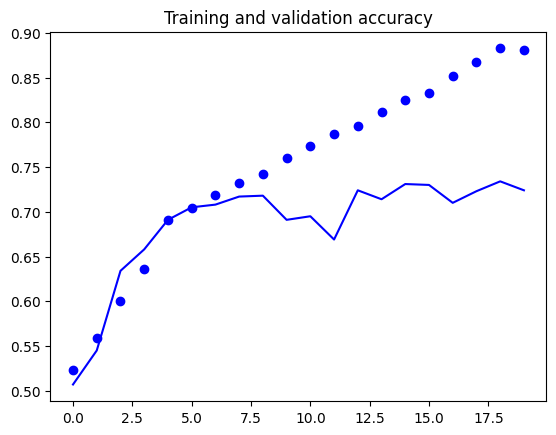

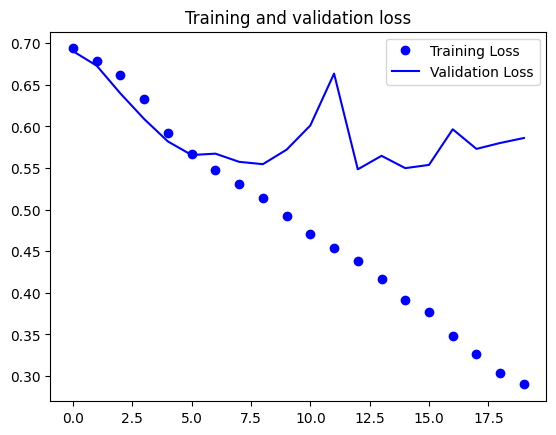

In [ ]:
# Plot training results
plot_loss_acc(history)

Data Augmentation

In [ ]:
# Updated to do image augmentation
 train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# For more see
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,               # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')     # Since we use binary_crossentropy loss, we need binary labels

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch = 100,   # 2000 images = batch_size * steps
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,    # 1000 images = batch_size * steps
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 129s - loss: 0.6897 - accuracy: 0.5350 - val_loss: 0.6808 - val_accuracy: 0.6080 - 129s/epoch - 1s/step
Epoch 2/30
100/100 - 131s - loss: 0.6818 - accuracy: 0.5595 - val_loss: 0.6663 - val_accuracy: 0.6010 - 131s/epoch - 1s/step
Epoch 3/30
100/100 - 130s - loss: 0.6759 - accuracy: 0.5725 - val_loss: 0.6497 - val_accuracy: 0.6110 - 130s/epoch - 1s/step
Epoch 4/30
100/100 - 135s - loss: 0.6642 - accuracy: 0.5865 - val_loss: 0.6339 - val_accuracy: 0.6260 - 135s/epoch - 1s/step
Epoch 5/30
100/100 - 135s - loss: 0.6531 - accuracy: 0.6070 - val_loss: 0.6229 - val_accuracy: 0.6420 - 135s/epoch - 1s/step
Epoch 6/30
100/100 - 135s - loss: 0.6347 - accuracy: 0.6340 - val_loss: 0.6425 - val_accuracy: 0.6160 - 135s/epoch - 1s/step
Epoch 7/30
100/100 - 130s - loss: 0.6350 - accuracy: 0.6285 - val_loss: 0.6013 - val_accuracy: 0.6730 - 130s/epoch - 1s/step
Epoch 8/30
100/100 - 135s - loss: 0.6220 

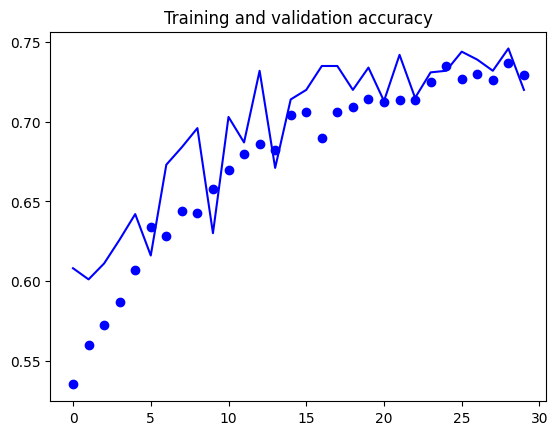

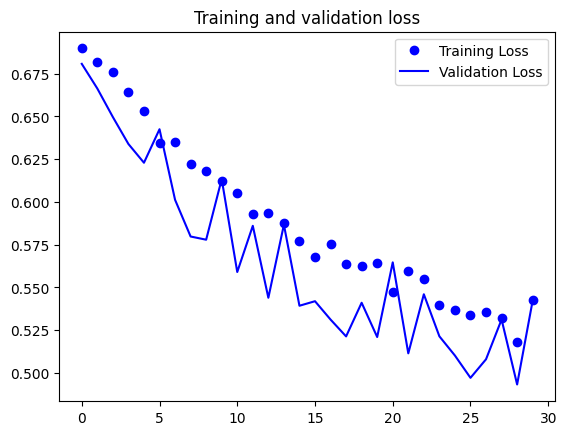

In [ ]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

In [ ]:
# Lab 2


The image augmentation introduces a random element
to the training images but if
the validation set doesn't have the same randomness,
then its results can fluctuate.
So bear in mind that you don't just
need a broad set of images for training,
you also need them for testing or
the image augmentation won't help you very much.

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-07-20 15:58:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.167.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   157MB/s    in 0.9s    

2023-07-20 15:58:55 (157 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-07-20 15:59:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.167.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-07-20 15:59:14 (86.0 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

# Directory with training horse pictures
train_horse_dir = os.path.join('tmp/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('tmp/horse-or-human/humans')

# Directory with training horse pictures
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')

# Directory with training human pictures
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
# Apply data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'tmp/horse-or-human/',   # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='binary')     # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),            # All images will be resized to 300x300
        batch_size=32,
        class_mode='binary')               # Since we use binary_crossentropy loss, we need binary labels

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 135s 16s/step - loss: 0.6893 - accuracy: 0.5186 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 125s 15s/step - loss: 0.6881 - accuracy: 0.5150 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 129s 16s/step - loss: 0.6733 - accuracy: 0.6040 - val_loss: 0.8966 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 125s 18s/step - loss: 0.6810 - accuracy: 0.5473 - val_loss: 0.6711 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 123s 17s/step - loss: 0.6637 - accuracy: 0.5996 - val_loss: 0.6474 - val_accuracy: 0.5781
Epoch 6/20
8/8 [==============================] - 122s 15s/step - loss: 0.6539 - accuracy: 0.6151 - val_loss: 0.6338 - val_accuracy: 0.6055
Epoch 7/20
8/8 [==============================] - 124s 15s/step - loss: 0.6320 - accuracy: 0.6474 - val_loss: 0.6086 - val_accuracy: 0.5469
Epoch 8/20
8/8 [====

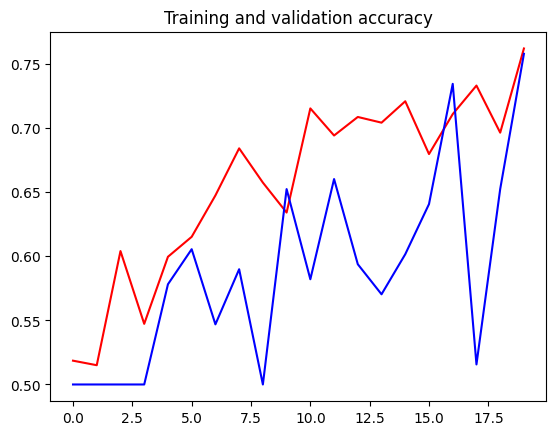

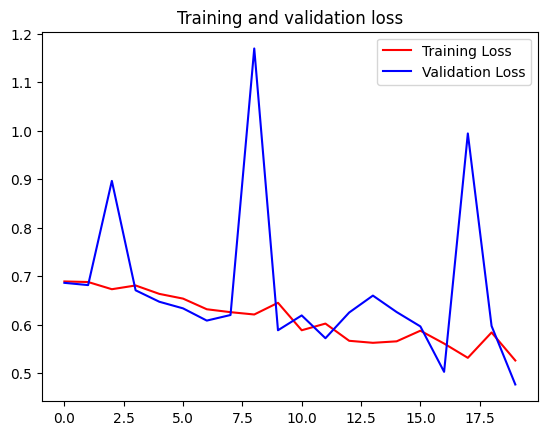

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Week 3

Transfer Learning

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-07-22 06:31:04--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2023-07-22 06:31:05 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the eights file downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model
# Set the input shape and remove the dense layers
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,          #Removing the dense layers at top
                                weights = None)

# Load the pre-trained weights downloaded
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers
for layers1 in pre_trained_model.layers:            # Beware of the layers name in the for loop
  layers.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 74, 74, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_376 (Batch  (None, 74, 74, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
# Choose 'mixed7' as the last layer of the base model
last_layer = pre_trained_model.get_layer('mixed7')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Adding a dense layer
# Also dropout

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. Check the dense network connected at the end
model.summary()

ValueError: ignored

Week 4

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-08-02 15:17:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   154MB/s    in 1.2s    

2023-08-02 15:17:25 (154 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-08-02 15:17:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-s

In [ ]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [ ]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-040.png', 'rock03-005.png', 'rock02-078.png', 'rock04-112.png', 'rock03-081.png', 'rock03-000.png', 'rock02-073.png', 'rock06ck02-032.png', 'rock06ck02-100.png', 'rock02-082.png']
['paper07-043.png', 'paper03-026.png', 'paper06-048.png', 'paper06-104.png', 'paper01-002.png', 'paper03-105.png', 'paper07-017.png', 'paper03-013.png', 'paper06-075.png', 'paper05-018.png']
['testscissors01-046.png', 'scissors02-032.png', 'scissors04-107.png', 'scissors02-026.png', 'testscissors03-105.png', 'testscissors01-056.png', 'scissors02-111.png', 'testscissors03-005.png', 'scissors03-011.png', 'scissors02-033.png']


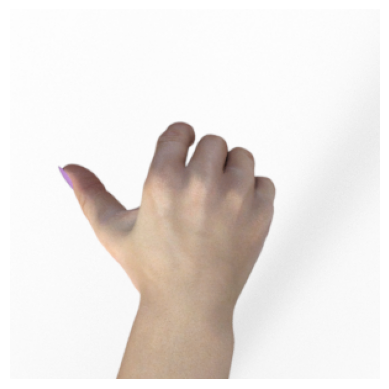

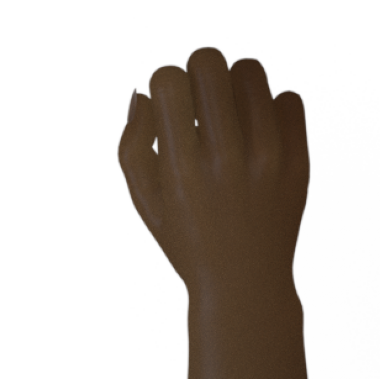

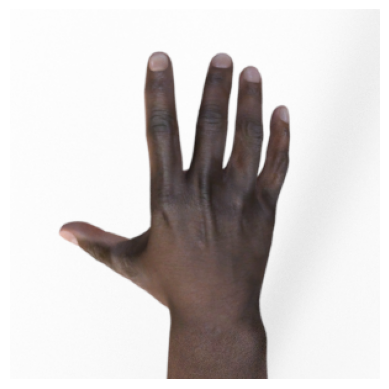

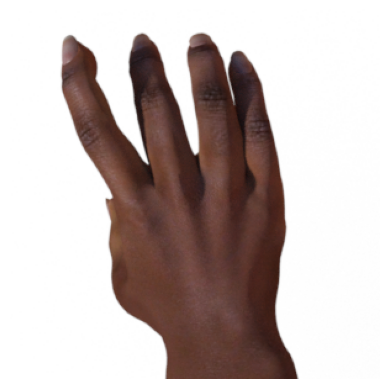

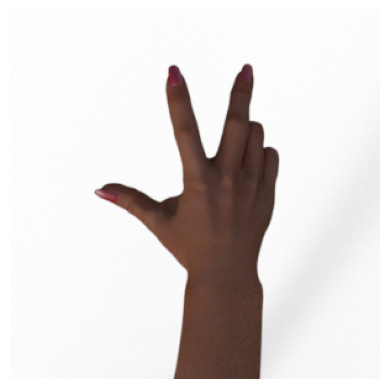

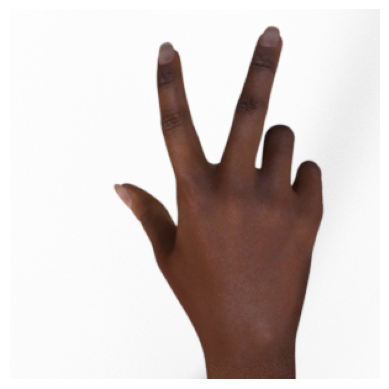

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
# Model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Prepare the ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 221s 11s/step - loss: 1.1813 - accuracy: 0.3337 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 214s 11s/step - loss: 1.0970 - accuracy: 0.3675 - val_loss: 1.0823 - val_accuracy: 0.3656
Epoch 3/25
20/20 [==============================] - 214s 11s/step - loss: 1.1082 - accuracy: 0.3948 - val_loss: 1.0687 - val_accuracy: 0.4140
Epoch 4/25
20/20 [==============================] - 222s 11s/step - loss: 1.0086 - accuracy: 0.4726 - val_loss: 0.7496 - val_accuracy: 0.8737
Epoch 5/25
20/20 [==============================] - 215s 11s/step - loss: 0.9254 - accuracy: 0.5298 - val_loss: 0.7024 - val_accuracy: 0.8226
Epoch 6/25
20/20 [==============================] - 221s 11s/step - loss: 0.8323 - accuracy: 0.6103 - val_loss: 0.8708 - val_accuracy: 0.6478
Epoch 7/25
20/20 [==============================] - 214s 11s/step - loss: 0.7352 - accuracy: 0.6619 - val_loss: 0.7130 - val_accuracy: 0.7823
Epoch 

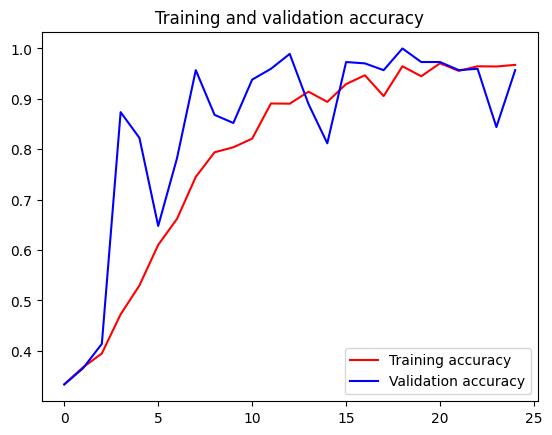

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# Model Prediction

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock-paper-scissors-rock-hand-isolated-white-31662043.webp to rock-paper-scissors-rock-hand-isolated-white-31662043.webp
1/1 [==============================] - 0s 159ms/step
rock-paper-scissors-rock-hand-isolated-white-31662043.webp
[[1. 0. 0.]]
